<a href="https://colab.research.google.com/github/adrianpychan/personalprojects/blob/main/Liverpool_Sentimental_Analysis_Twitter_API_Scrape_%5BClean%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Liverpool Sentiment Analysis

In [36]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.graph_objs as go
import plotly.express as px
import csv

In [2]:
api_key = "LIdZvmcN4xELHDAc741C3LfMI"
api_secret = "JNsdeCaIBXYtNmUV9VfZtIJ9dXJI8ll8zBoceDLd6KeFaB0f7i"
access_token = "164030444-W5RQkqX0yqI4HFFl84Kp4SF8n45h4x4zEufbryve"
access_secret = "jtOe36nKnBTMZmLzxkC1LXHDRZLyQuvNrDBlDijTiwQbm"

In [3]:
auth = tweepy.AppAuthHandler(api_key, api_secret)
#auth.set_access_token(access_token, access_secret)

In [4]:
api = tweepy.API(auth, wait_on_rate_limit = True)

In [5]:
search_key = "Liverpool"

for tweet in tweepy.Cursor(api.search, q = search_key, count = 1000, lang = "en", since = "2021-03-01", until = "2021-03-04").items(1):
  print(tweet)

Status(_api=<tweepy.api.API object at 0x7f2b13e5d410>, _json={'created_at': 'Wed Mar 03 23:59:59 +0000 2021', 'id': 1367263516009324544, 'id_str': '1367263516009324544', 'text': 'RT @ryanw2345: City 27 games 65 points \nUnreal , best ever , what a team, relentless, Peps a genius , \n(No Fans) all season \nLiverpool 27 g…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ryanw2345', 'name': 'Lester19*', 'id': 3910350490, 'id_str': '3910350490', 'indices': [3, 13]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 264342152, 'id_str': '264342152', 'name': 'SwiffyC', 'screen_name': 'swiffyc', 'location': '', 'description': '', 'url': None, 'entities'

In [6]:
tweet_text = []
user_screen_name = []
user_name = []
user_location = []
user_followers_count = []
user_friends_count = []
user_listed_count = []
user_favourites_count = []
tweet_created_at = []
tweet_id = []

In [7]:
for tweet in tweepy.Cursor(api.search, q = search_key, count = 1000, lang = "en", since = "2021-03-01", until = "2021-03-04").items(5000):
  tweet_text.append(tweet.text)
  user_screen_name.append(tweet.user.screen_name)
  user_name.append(tweet.user.name)
  user_location.append(tweet.user.location)
  user_followers_count.append(tweet.user.followers_count)
  user_friends_count.append(tweet.user.friends_count)
  user_listed_count.append(tweet.user.listed_count)
  user_favourites_count.append(tweet.user.favourites_count)
  tweet_created_at.append(tweet.created_at)
  tweet_id.append(tweet.id)

In [8]:
dict_tweets = {"tweet_text": tweet_text, 
               "user_screen_name": user_screen_name,
               "user_name": user_name,
               "user_location":user_location,
               "user_followers_count": user_followers_count,
               "user_friends_count": user_friends_count,
               "user_listed_count": user_listed_count,
               "user_favourites_count": user_favourites_count,
               "tweet_created_at": tweet_created_at,
               "tweet_id ": tweet_id,
               #"is_retweet": is_retweet
               }

In [96]:
df = pd.DataFrame(dict_tweets, columns = [keys for keys in dict_tweets])
df

,tweet_text,user_screen_name,user_name,user_location,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,tweet_created_at,tweet_id
0,RT @ryanw2345: City 27 games 65 points \nUnrea...,swiffyc,SwiffyC,,208,853,6,14901,2021-03-03 23:59:59,1367263516009324544
1,@G_Gel8 @TheBadManTips You’re ignoring the oth...,FootieRealist,Football Realist,Here,69,291,2,524,2021-03-03 23:59:56,1367263503212494853
2,RT @fcDavee: Salah scored more goals in his fi...,PrimeSadio,AA,,4580,1317,10,53216,2021-03-03 23:59:42,1367263445842882568
3,"RT @LDNFootbalI: With a win over Liverpool, Ch...",CFCTaron,Taron Sachdeva,"London, England",188,290,0,14902,2021-03-03 23:59:34,1367263413475418115
4,"RT @StevenW69808657: So Joanne Anderson, one o...",neemo2357,Neemo,United Kingdom,1771,2384,32,136062,2021-03-03 23:59:32,1367263401525846021
...,...,...,...,...,...,...,...,...,...,...
4995,RT @frankfieldteam: I lobbied for a free port ...,lynnjackson57,Lynn,Kingston upon Hull,220,399,3,102260,2021-03-03 22:06:57,1367235072722685952
4996,@GianniButtice As will liverpool tomorrow🔥,FPL_Giant,FPL Giant,,51,143,0,6394,2021-03-03 22:06:57,1367235072668147712
4997,RT @TheSunFootball: Georginio Wijnaldum ‘reach...,LucaParry85,Luca Parry,boh,741,98,7,65434,2021-03-03 22:06:57,1367235072332595201
4998,@jamiehamo10 Liverpool finish above yous,HaydenMurphy18,Hayden Murphy,"Dublin City, Ireland",123,147,0,1552,2021-03-03 22:06:57,1367235068800950272


## Dating Cleaning

Applying to see if it is a Retweet or has Hashtags:

In [97]:
df["RT"] = df["tweet_text"].str.startswith('RT ')
df["Hashtag"] = df["tweet_text"].str.contains('#')
df["RT"] = df['RT'].astype(str)
df.loc[df["RT"].str.contains('True', case=False, na = False), "RT"] = "Retweet"
df.loc[df["RT"].str.contains('False', case=False, na = False), "RT"] = "Tweet"
df.head(5)

,tweet_text,user_screen_name,user_name,user_location,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,tweet_created_at,tweet_id,RT,Hashtag
0,RT @ryanw2345: City 27 games 65 points \nUnrea...,swiffyc,SwiffyC,,208,853,6,14901,2021-03-03 23:59:59,1367263516009324544,Retweet,False
1,@G_Gel8 @TheBadManTips You’re ignoring the oth...,FootieRealist,Football Realist,Here,69,291,2,524,2021-03-03 23:59:56,1367263503212494853,Tweet,False
2,RT @fcDavee: Salah scored more goals in his fi...,PrimeSadio,AA,,4580,1317,10,53216,2021-03-03 23:59:42,1367263445842882568,Retweet,False
3,"RT @LDNFootbalI: With a win over Liverpool, Ch...",CFCTaron,Taron Sachdeva,"London, England",188,290,0,14902,2021-03-03 23:59:34,1367263413475418115,Retweet,False
4,"RT @StevenW69808657: So Joanne Anderson, one o...",neemo2357,Neemo,United Kingdom,1771,2384,32,136062,2021-03-03 23:59:32,1367263401525846021,Retweet,False


Cleaning the Text:

In [98]:
import re 

def cleantext(text):
  text = re.sub(r'@[A-Za-z0-9]+', "", text) #Removes @mentions from tweet_text:
  text = re.sub(r'#', "", text) #Removes #hashtags from tweet_text:
  text = re.sub(r'RT[\s]+', "", text) #Removes RT from tweet_text:
  text = re.sub(r':+', "", text) #Removes : from tweet_text:
  text = re.sub(r'_[A-Za-z0-9]+', "", text) #Removes _ from tweet_text:
  text = re.sub(r'https\S+', '', text) #Removes hyperlinks from tweet_text:
  
  return text

In [99]:
df["Clean Tweets"] = df["tweet_text"].apply(cleantext)
df.head(5)

,tweet_text,user_screen_name,user_name,user_location,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,tweet_created_at,tweet_id,RT,Hashtag,Clean Tweets
0,RT @ryanw2345: City 27 games 65 points \nUnrea...,swiffyc,SwiffyC,,208,853,6,14901,2021-03-03 23:59:59,1367263516009324544,Retweet,False,"City 27 games 65 points \nUnreal , best ever ..."
1,@G_Gel8 @TheBadManTips You’re ignoring the oth...,FootieRealist,Football Realist,Here,69,291,2,524,2021-03-03 23:59:56,1367263503212494853,Tweet,False,You’re ignoring the other two though. Ok. Ho...
2,RT @fcDavee: Salah scored more goals in his fi...,PrimeSadio,AA,,4580,1317,10,53216,2021-03-03 23:59:42,1367263445842882568,Retweet,False,Salah scored more goals in his first season w...
3,"RT @LDNFootbalI: With a win over Liverpool, Ch...",CFCTaron,Taron Sachdeva,"London, England",188,290,0,14902,2021-03-03 23:59:34,1367263413475418115,Retweet,False,"With a win over Liverpool, Chelsea will go......"
4,"RT @StevenW69808657: So Joanne Anderson, one o...",neemo2357,Neemo,United Kingdom,1771,2384,32,136062,2021-03-03 23:59:32,1367263401525846021,Retweet,False,"So Joanne Anderson, one of Keiths two scabs r..."


## Exploratory Data Analysis

Word Occurrence without Stopwords:

In [100]:
from collections import Counter
import pandas as pd
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#Add "#" into List:
stop_words.append("#")
stop_words.append("RT")
stop_words.append("vs.")
stop_words.append("always")
stop_words.append("wild")
stop_words.append("a")
stop_words.append("the")
stop_words.append("to")
stop_words.append("in")
stop_words.append("and")
stop_words.append("is")
stop_words.append("for")
stop_words.append("of")
stop_words.append("have")
stop_words.append("be")
stop_words.append("are")
stop_words.append("I")

In [101]:
no_stop_words = df['Clean Tweets'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
no_stop_words.str.split(expand=True).stack().value_counts().head(10)

Liverpool     3087
Chelsea        855
United         647
v              499
points         499
season         439
City           429
0-0            427
Manchester     410
Leicester      339
dtype: int64

Most Hashtags Used:

In [102]:
df['tweet_text'].str.extractall(r'(\#\w+)')[0].value_counts().head(10)

#Liverpool        102
#LFC               75
#YNWA              68
#mufc              53
#LIVCHE            46
#dogs              16
#dogsoftwitter     16
#LIVERPOOL         15
#CFC               11
#CRYMUN            10
Name: 0, dtype: int64

## Sentiment and Subjective Analysis

Import Libraries:

In [103]:
from textblob import TextBlob

Create Function to get Subjectivity:

In [104]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

Create Function to get Polarity:

In [105]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

Create two new columns with Subjectivity and Polarity Scores:

In [106]:
df["Subjectivity Score"] = df["Clean Tweets"].apply(getSubjectivity)
df["Polarity Score"] = df["Clean Tweets"].apply(getPolarity)

Create a Function to compute the negative, positive and neutral analysis:

In [108]:
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

In [109]:
df["Analysis"] = df["Polarity Score"].apply(getAnalysis)
df.head(3)

,tweet_text,user_screen_name,user_name,user_location,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,tweet_created_at,tweet_id,RT,Hashtag,Clean Tweets,Subjectivity Score,Polarity Score,Analysis
0,RT @ryanw2345: City 27 games 65 points \nUnrea...,swiffyc,SwiffyC,,208,853,6,14901,2021-03-03 23:59:59,1367263516009324544,Retweet,False,"City 27 games 65 points \nUnreal , best ever ...",0.300000,1.000,Positive
1,@G_Gel8 @TheBadManTips You’re ignoring the oth...,FootieRealist,Football Realist,Here,69,291,2,524,2021-03-03 23:59:56,1367263503212494853,Tweet,False,You’re ignoring the other two though. Ok. Ho...,0.375000,-0.125,Negative
2,RT @fcDavee: Salah scored more goals in his fi...,PrimeSadio,AA,,4580,1317,10,53216,2021-03-03 23:59:42,1367263445842882568,Retweet,False,Salah scored more goals in his first season w...,0.486111,0.250,Positive


In [110]:
df["Polarity Score"].mean()

0.09939795161447297

In [111]:
df[df["Polarity Score"]==df["Polarity Score"].min()]

,tweet_text,user_screen_name,user_name,user_location,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,tweet_created_at,tweet_id,RT,Hashtag,Clean Tweets,Subjectivity Score,Polarity Score,Analysis
1356,@4PocketsFu11 @K14N16 @mufcAM @ESPNFC Yeah.......,KoalaGibbs,Adam,,26,110,0,98,2021-03-03 23:17:05,1367252720189587456,Tweet,False,Yeah...... it does. Gone from one of the w...,1.0,-1.0,Negative
2146,@Haider_Rubbani Oh we've been terrible since t...,IwanDoherty98,Iwan Doherty,,3904,2648,17,12648,2021-03-03 22:55:53,1367247385127251968,Tweet,False,Oh we've been terrible since the draw to Live...,1.0,-1.0,Negative
2393,"@KevinDaHamster Agree, but It will be shocking...",Utdandresan,Andre Sanchez,,10,272,0,4786,2021-03-03 22:50:00,1367245906207117313,Tweet,False,"Agree, but It will be shocking for Liverpool ...",1.0,-1.0,Negative
3619,"@cigg___ United, Chelsea, liverpool I don’t ev...",AIexBarbaro,Alex,"North London, UK",4837,476,45,95002,2021-03-03 22:26:58,1367240107305168901,Tweet,False,"___ United, Chelsea, liverpool I don’t even wa...",1.0,-1.0,Negative
3672,@CFC_Ali10 Draw isn’t a terrible result. Don’t...,LDNFootbalI,LDN,"London, England",49757,722,302,35179,2021-03-03 22:26:03,1367239878249955330,Tweet,False,Draw isn’t a terrible result. Don’t lose any ...,1.0,-1.0,Negative
4094,Manchester United - the worst title challenger...,Batchowski6X,Mark,"Medellín, Colombia",1101,1106,0,22200,2021-03-03 22:20:05,1367238374726250497,Tweet,True,Manchester United - the worst title challenger...,1.0,-1.0,Negative
4167,@IgnisRay @Danyaal53882513 @aa_q6657 @anfieldr...,SamSwift1998,Swifty,,53,77,0,56,2021-03-03 22:19:03,1367238114733944840,Tweet,False,This is the worst season for every team n...,1.0,-1.0,Negative
4339,@anfieldredsss @FCBarcelona @Dembouz @3gerardp...,tilexzfn,tilexz,,27,176,0,766,2021-03-03 22:16:27,1367237462083403780,Tweet,False,"Ah yes, another delusional Liverpool fan. ...",1.0,-1.0,Negative
4406,"@notShivansh Yeah man, sell anyone and get a d...",unxtxdlegend,☄️,,67,387,0,29114,2021-03-03 22:15:19,1367237175801122816,Tweet,False,"Yeah man, sell anyone and get a dm man idc. W...",1.0,-1.0,Negative
4582,"RT @TweetChelseaUK: After tonight’s results, a...",JordaanSZN,Jordan.,,1455,264,13,30694,2021-03-03 22:12:55,1367236573721464832,Retweet,False,"After tonight’s results, a draw tomorrow woul...",1.0,-1.0,Negative


Plot Polarity:

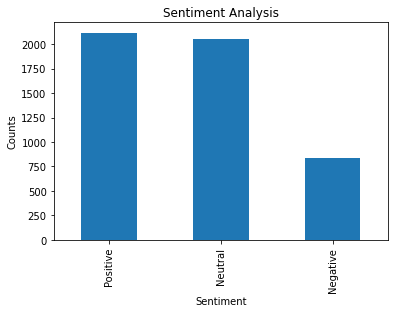

In [112]:
plt.figure(figsize = (6,4))
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind = "bar")

Visualise Positive, Neutral and Negative Tweets:

In [113]:
positive_text = df["Clean Tweets"][df["Analysis"]=="Positive"].apply(lambda x : x.split())
negative_text = df["Clean Tweets"][df["Analysis"]=="Negative"].apply(lambda x : x.split())
neutral_text = df["Clean Tweets"][df["Analysis"]=="Neutral"].apply(lambda x : x.split())

In [114]:
positive_text = [word for word in positive_text if word not in stopwords.words('english')]
negative_text = [word for word in negative_text if word not in stopwords.words('english')]
neutral_text = [word for word in neutral_text if word not in stopwords.words('english')]

In [115]:
# Merge all the lists into one common list
positive_text = sum(positive_text, [])
negative_text = sum(negative_text, [])
neutral_text = sum(neutral_text, [])

In [116]:
freq_pos = nltk.FreqDist(positive_text)
pos_df = pd.DataFrame({
    "words":list(freq_pos.keys()),
    "Count":list(freq_pos.values())
    })

common_pos = pos_df.nlargest(columns="Count", n=30)
fig = px.bar(common_pos, x="words", y="Count", labels={"words": "Words", "Count":"Frequency"}, title="Positive Analysis",)
fig.show();

In [117]:
freq_pos = nltk.FreqDist(negative_text)
pos_df = pd.DataFrame({
    "words":list(freq_pos.keys()),
    "Count":list(freq_pos.values())
    })

common_pos = pos_df.nlargest(columns="Count", n=30)
fig = px.bar(common_pos, x="words", y="Count", labels={"words": "Words", "Count":"Frequency"}, title="Negative Analysis",)
fig.show();

In [118]:
freq_pos = nltk.FreqDist(neutral_text)
pos_df = pd.DataFrame({
    "words":list(freq_pos.keys()),
    "Count":list(freq_pos.values())
    })

common_pos = pos_df.nlargest(columns="Count", n=30)
fig = px.bar(common_pos, x="words", y="Count", labels={"words": "Words", "Count":"Frequency"}, title="Neutral Analysis",)
fig.show();

## WordCloud

In [119]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

*Tweets WordCloud*

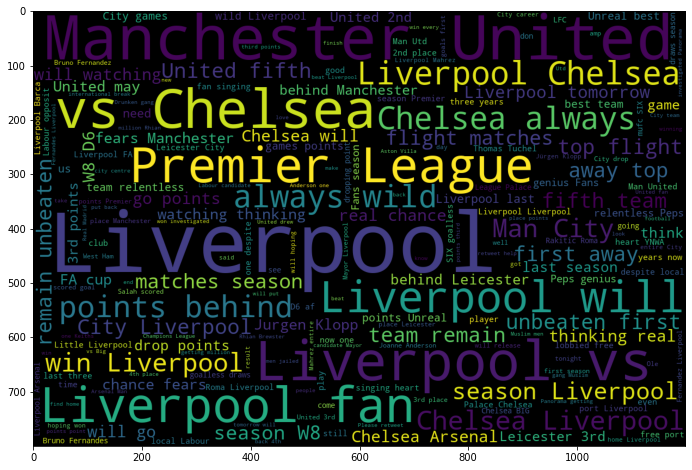

In [120]:
#Tweets Wordcloud:

allWords = ' '.join([twts for twts in df["Clean Tweets"]])
clean_tweets = WordCloud(width=1200, height=800, random_state = 21).generate(allWords)

# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(clean_tweets) 

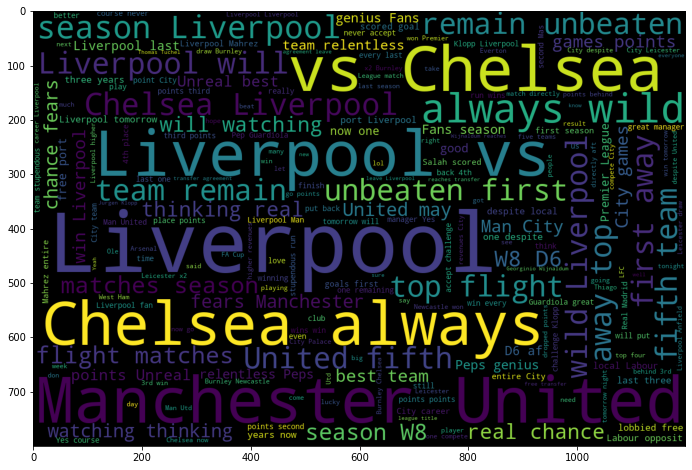

In [121]:
positive_words = " ".join([word for word in df["Clean Tweets"][df["Analysis"] == "Positive"]])
positive_tweets = WordCloud(width=1200, height=800, random_state = 21).generate(positive_words)

plt.figure(figsize=(12,8))
plt.imshow(positive_tweets) 

*@Callouts WordCloud*

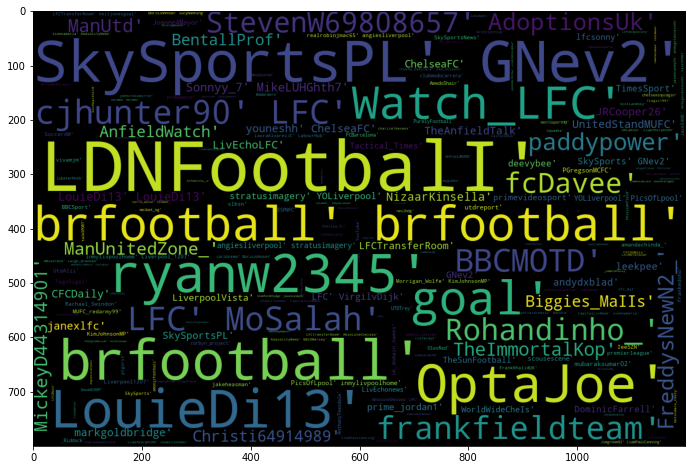

In [122]:
callouts = df['tweet_text'].str.extractall(r'(\@\w+)')[0].tolist()

wordcloud = WordCloud(width=1200, height=800).generate(str(callouts))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)

In [123]:
df.to_csv("liverpool.csv")

In [128]:
new_df = df.drop(columns = ["tweet_text", "user_screen_name", "user_name",	
                 "user_location", "user_followers_count",	"user_friends_count",	
                 "user_listed_count",	"user_favourites_count", "tweet_created_at",	
                 "tweet_id ", "RT",	"Hashtag"], axis = 1)

In [129]:
new_df

,Clean Tweets,Subjectivity Score,Polarity Score,Analysis
0,"City 27 games 65 points \nUnreal , best ever ...",0.300000,1.000000,Positive
1,You’re ignoring the other two though. Ok. Ho...,0.375000,-0.125000,Negative
2,Salah scored more goals in his first season w...,0.486111,0.250000,Positive
3,"With a win over Liverpool, Chelsea will go......",0.450000,0.000000,Neutral
4,"So Joanne Anderson, one of Keiths two scabs r...",0.000000,0.000000,Neutral
...,...,...,...,...
4995,I lobbied for a free port for Liverpool over ...,0.288889,0.133333,Positive
4996,As will liverpool tomorrow🔥,0.000000,0.000000,Neutral
4997,Georginio Wijnaldum ‘reaches transfer agreeme...,0.800000,0.400000,Positive
4998,Liverpool finish above yous,0.100000,0.000000,Neutral


In [131]:
new_df["Analysis"].value_counts()

Positive    2115
Neutral     2049
Negative     836
Name: Analysis, dtype: int64